In [140]:
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt

In [141]:
# Load the dataset
file_path = "./visitor_data_clickstream.csv"

all_data = []


class Visit:
    def __init__(self, line_of_file):
        line_of_file = line_of_file.rstrip("\n")
        data_items = line_of_file.split(",")
        self.source = data_items[0]
        self.platform = data_items[1]
        self.clickstream = [item for item in data_items[2:] if item != ""]

    def did_purchase(self):
        return "purchase_success" in self.clickstream

    def __repr__(self):
        return f"Visitor on {self.platform} \tfrom {self.source}\tvisited {len(self.clickstream)}"


cocc = 0

with open(file_path, "r") as file:
    lines = file.readlines()
    for line in lines:
        if "purchase_start" in line:
            cocc += 1
        data_item_object = Visit(line)
        all_data.append(data_item_object)

print(len(all_data),cocc)

160400 60540


In [142]:
# print(len(all_data))

# total = 0

# linkedinBounce, linkedinTotal, linkedinConversion = 0, 0, 0
# facebookBounce, facebookTotal, facebookConversion = 0, 0, 0
# partnerBounce, partnerTotal, partnerConversion = 0, 0, 0


for visit in all_data:
    print(visit.clickstream)

['blog_1', 'home', 'pricing', 'purchase_start', 'purchase_enter_address', 'purchase_success']
['blog_1', 'pricing', 'purchase_start', 'blog_1']
['home', 'blog_1']
['blog_2', 'home', 'blog_1']
['home', 'blog_1']
['home', 'blog_1', 'contact_us']
['home']
['blog_1', 'pricing']
['home', 'pricing', 'contact_us']
['blog_2', 'pricing', 'purchase_start']
['home']
['home', 'pricing', 'blog_1']
['contact_us']
['home', 'pricing', 'purchase_start']
['home', 'contact_us', 'blog_1', 'home']
['contact_us']
['blog_2', 'pricing', 'purchase_start', 'purchase_enter_address', 'purchase_success']
['contact_us']
['blog_2', 'pricing', 'blog_1']
['home', 'pricing', 'contact_us']
['home', 'pricing', 'purchase_start', 'purchase_enter_address', 'purchase_success', 'contact_us']
['home', 'contact_us']
['blog_1', 'pricing', 'purchase_start', 'purchase_enter_address']
['home', 'pricing', 'purchase_start', 'purchase_enter_address']
['home']
['home']
['home', 'blog_1', 'home', 'blog_1', 'pricing', 'contact_us']
['blo

In [143]:
from collections import defaultdict

sources = set()
for visit in all_data:
    sources.add(visit.source)

# print(list(sources))

# bounce rate
bounce_dict = defaultdict(int)
total_visit_dict = defaultdict(int)
conversion_dict = defaultdict(int)
longest_dict = defaultdict(int)

# total = 0
for i in all_data:
    # total += 1
    total_visit_dict[i.source] += 1
    if len(i.clickstream) <= 1:
        bounce_dict[i.source] += 1
    if "purchase_success" in i.clickstream:
        conversion_dict[i.source] += 1
    if len(i.clickstream) > longest_dict[i.source]:
        longest_dict[i.source] = len(i.clickstream)

pp.pprint(bounce_dict)
pp.pprint(conversion_dict)
pp.pprint(longest_dict)

print("####", total_visit_dict)

for key in total_visit_dict.keys():
    # print(key)
    bounce_dict[key] = bounce_dict[key] / total_visit_dict[key]
    conversion_dict[key] = conversion_dict[key] / total_visit_dict[key]


for key in total_visit_dict.keys():
    print(f"{key}:{bounce_dict[key]},{conversion_dict[key]},{longest_dict[key]}")

defaultdict(<class 'int'>,
            {'direct': 1287,
             'facebook_advert': 4262,
             'facebook_share': 8125,
             'linkedin_share': 4239,
             'search': 10537})
defaultdict(<class 'int'>,
            {'direct': 4275,
             'facebook_advert': 93,
             'facebook_share': 6657,
             'linkedin_advert': 504,
             'linkedin_share': 2546,
             'partner_advert': 545,
             'search': 8720})
defaultdict(<class 'int'>,
            {'direct': 12,
             'facebook_advert': 8,
             'facebook_share': 16,
             'linkedin_advert': 11,
             'linkedin_share': 18,
             'partner_advert': 13,
             'search': 16})
#### defaultdict(<class 'int'>, {'linkedin_share': 21200, 'facebook_share': 51300, 'search': 57400, 'direct': 13500, 'partner_advert': 5000, 'facebook_advert': 10000, 'linkedin_advert': 2000})
linkedin_share:0.19995283018867924,0.12009433962264152,18
facebook_share:0.158382

In [144]:
total_visit_dict = defaultdict(int)
platform_start_dict = defaultdict(int)
platform_success_dict = defaultdict(int)
dropout_dict = defaultdict(int)

total_starts, total_success = 0, 0

for i in all_data:

    # total += 1
    total_visit_dict[i.platform] += 1
    if "purchase_start" in i.clickstream:
        total_starts += 1
        platform_start_dict[i.platform] += 1
        if "purchase_success" in i.clickstream:
            total_success += 1
            platform_success_dict[i.platform] += 1

pp.pprint(total_visit_dict)
pp.pprint(platform_start_dict)
pp.pprint(platform_success_dict)

print("####", total_starts)

for key in total_visit_dict.keys():
    # print(key)
    dropout_dict[key] = platform_success_dict[key] / platform_start_dict[key]


for key in total_visit_dict.keys():
    print(f"{key}:{dropout_dict[key]}")

defaultdict(<class 'int'>,
            {'android': 44500,
             'ios': 44500,
             'mac': 28000,
             'unknown': 15400,
             'windows': 28000})
defaultdict(<class 'int'>,
            {'android': 16645,
             'ios': 16618,
             'mac': 10777,
             'unknown': 5680,
             'windows': 10820})
defaultdict(<class 'int'>,
            {'android': 6642,
             'ios': 5649,
             'mac': 4481,
             'unknown': 1976,
             'windows': 4592})
#### 60540
android:0.39903875037548814
ios:0.33993260320134794
windows:0.4243992606284658
unknown:0.34788732394366195
mac:0.41579289227057625


android
OrderedDict([('contact_us', 0.26242802049764913),
             ('home', 0.19081832109461672),
             ('blog_1', 0.17716202652015425),
             ('pricing', 0.15843414866078503),
             ('purchase_start', 0.09456389666649057),
             ('purchase_enter_address', 0.06912673675313012),
             ('blog_2', 0.026176765809076023),
             ('special_advert_deal', 0.021290083998098158)])


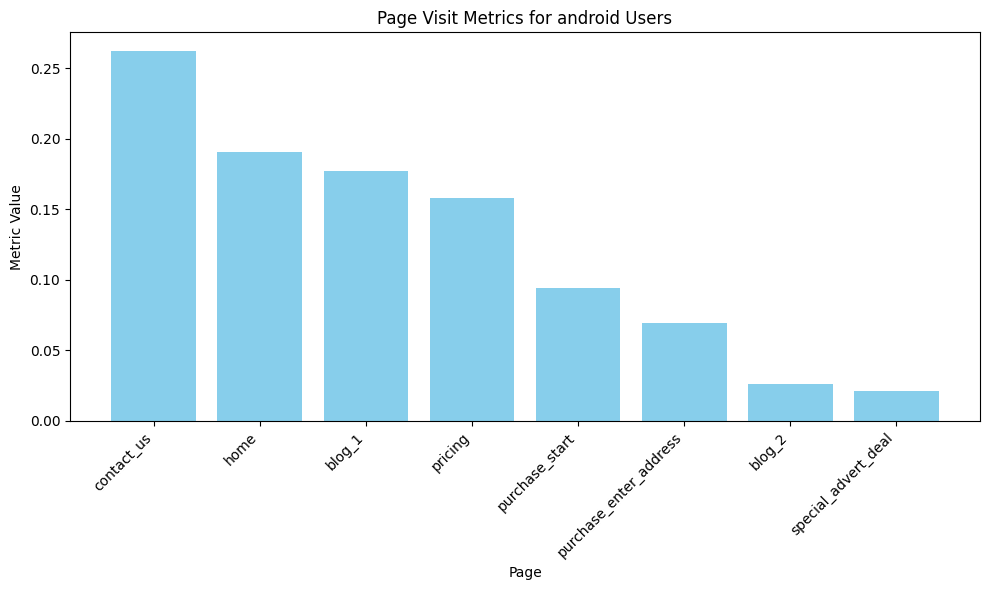

ios
OrderedDict([('contact_us', 0.24702066870865616),
             ('home', 0.1815912074335281),
             ('blog_1', 0.1723507760418007),
             ('pricing', 0.1484131682582173),
             ('purchase_enter_address', 0.11194049059226274),
             ('purchase_start', 0.08895523924738102),
             ('blog_2', 0.026974852642145632),
             ('special_advert_deal', 0.02275359707600834)])


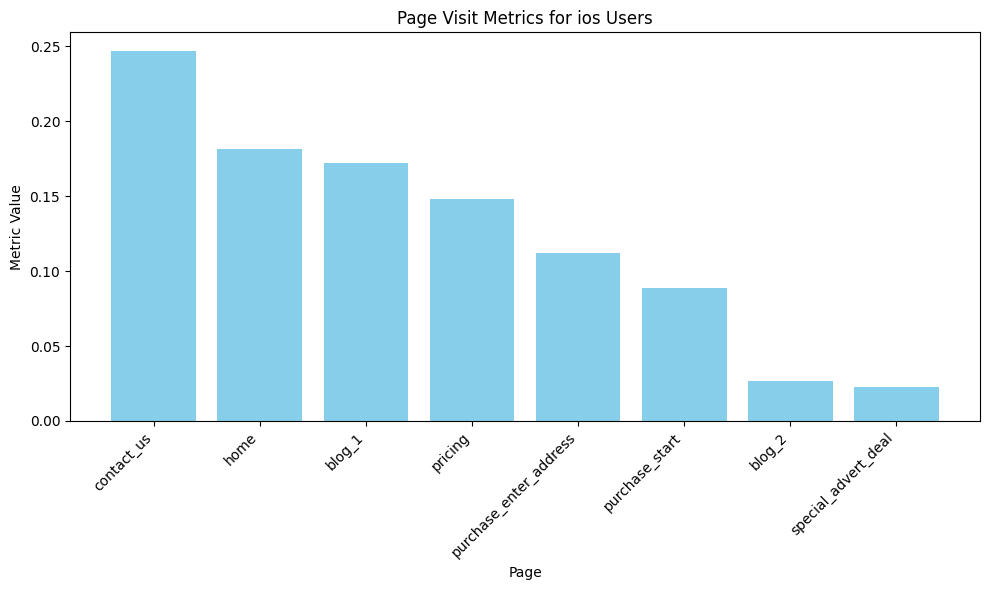

windows
OrderedDict([('contact_us', 0.25820232399179766),
             ('home', 0.2054853041695147),
             ('pricing', 0.1674213943950786),
             ('blog_1', 0.14853896103896103),
             ('purchase_start', 0.1063738892686261),
             ('purchase_enter_address', 0.05207621326042379),
             ('special_advert_deal', 0.03648325358851675),
             ('blog_2', 0.02541866028708134)])


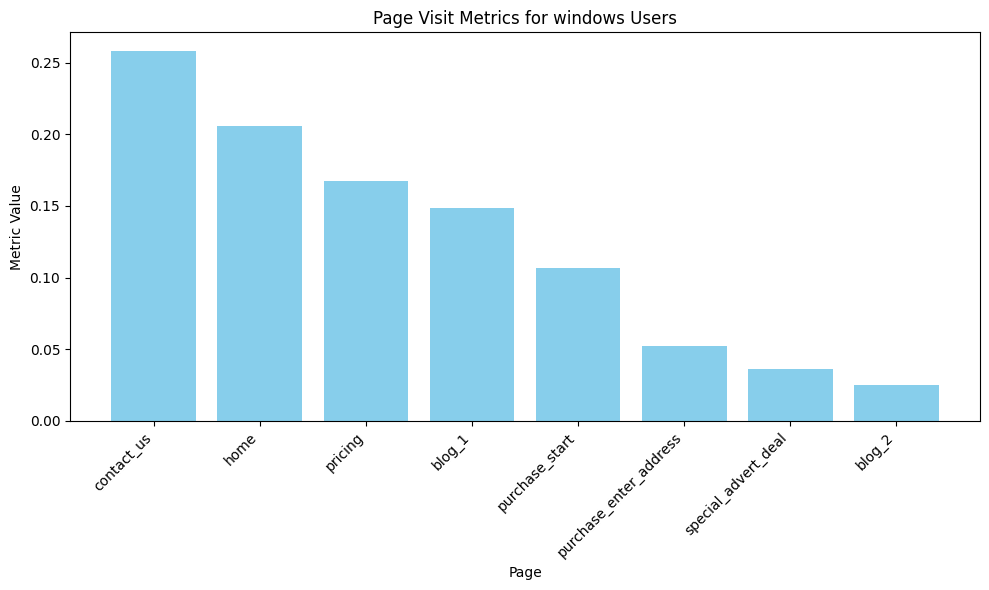

mac
OrderedDict([('contact_us', 0.2567286024065649),
             ('home', 0.2033674901143756),
             ('pricing', 0.1704579276329776),
             ('blog_1', 0.14958118967643183),
             ('purchase_start', 0.10753008206131213),
             ('purchase_enter_address', 0.0522556231132276),
             ('special_advert_deal', 0.035758323057953144),
             ('blog_2', 0.024320761937157192)])


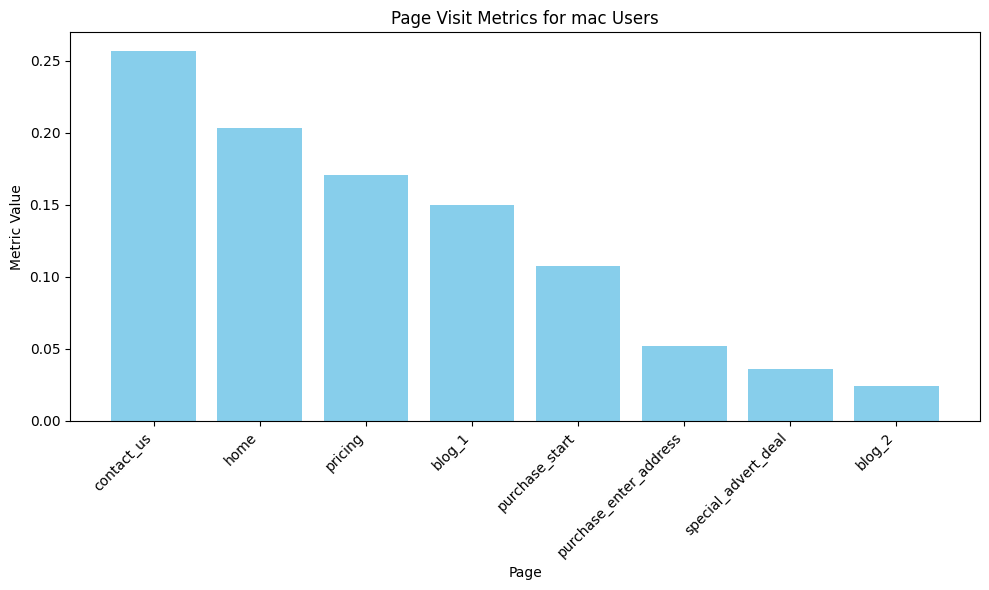

unknown
OrderedDict([('contact_us', 0.25610846245530394),
             ('blog_1', 0.15971394517282478),
             ('pricing', 0.15822407628128723),
             ('home', 0.1518921334922527),
             ('purchase_start', 0.10853694874851014),
             ('purchase_enter_address', 0.07345053635280095),
             ('special_advert_deal', 0.06533075089392133),
             ('blog_2', 0.026743146603098927)])


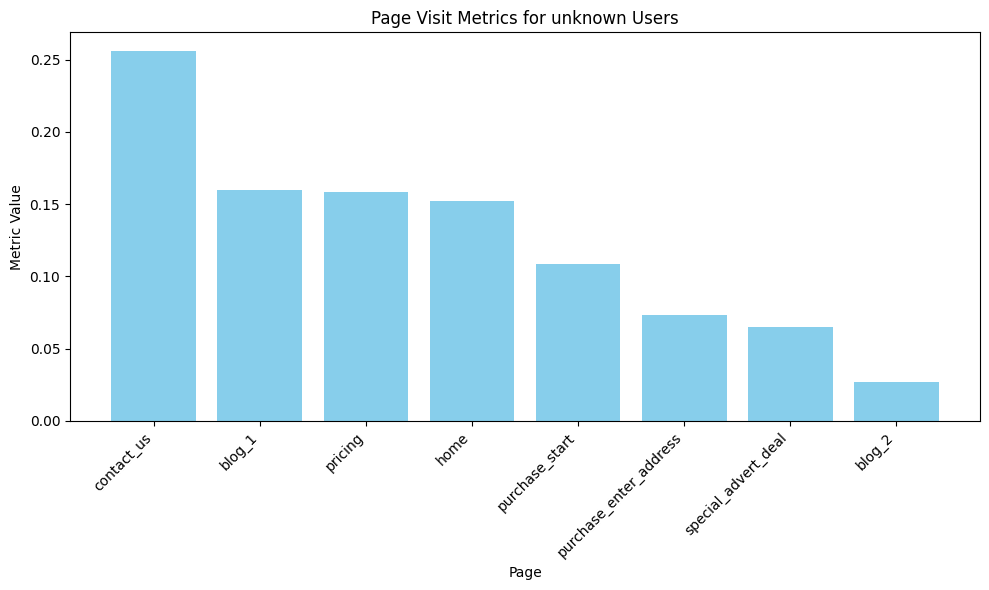

In [145]:
for pl in ["android", "ios", "windows", "mac", "unknown"]:
    last_stage_dict = defaultdict(int)
    total_stop_dict = defaultdict(int)
    result_dict = defaultdict(int)
    total_stop = 0
    for i in all_data:
        if "purchase_success" not in i.clickstream and i.platform == pl:
            total_stop += 1
            last_stage_dict[i.clickstream[-1]] += 1

    from collections import OrderedDict

    # Calculate the proportions
    for key in last_stage_dict.keys():
        result_dict[key] = last_stage_dict[key] / total_stop

    # Sort the dictionary by value in descending order and keep the order
    sorted_result_dict = OrderedDict(
        sorted(result_dict.items(), key=lambda item: item[1], reverse=True)
    )

    print(pl)
    pp.pprint(sorted_result_dict)

    # 准备x轴和y轴的数据
    pages = list(sorted_result_dict.keys())
    values = list(sorted_result_dict.values())

    # 创建条形图
    plt.figure(figsize=(10, 6))  # 可以调整大小以适合你的数据
    plt.bar(pages, values, color="skyblue")  # 可以自定义颜色

    # 添加标题和轴标签
    plt.title(f"Page Visit Metrics for {pl} Users")
    plt.xlabel("Page")
    plt.ylabel("Metric Value")

    # 旋转x轴标签以便它们更容易阅读
    plt.xticks(rotation=45, ha="right")

    # 显示图表
    plt.tight_layout()  # 调整布局以适应标签
    plt.show()

android
OrderedDict([('contact_us', 0.26242802049764913),
             ('home', 0.19081832109461672),
             ('blog_1', 0.17716202652015425),
             ('pricing', 0.15843414866078503),
             ('purchase_start', 0.09456389666649057),
             ('purchase_enter_address', 0.06912673675313012),
             ('blog_2', 0.026176765809076023),
             ('special_advert_deal', 0.021290083998098158)])


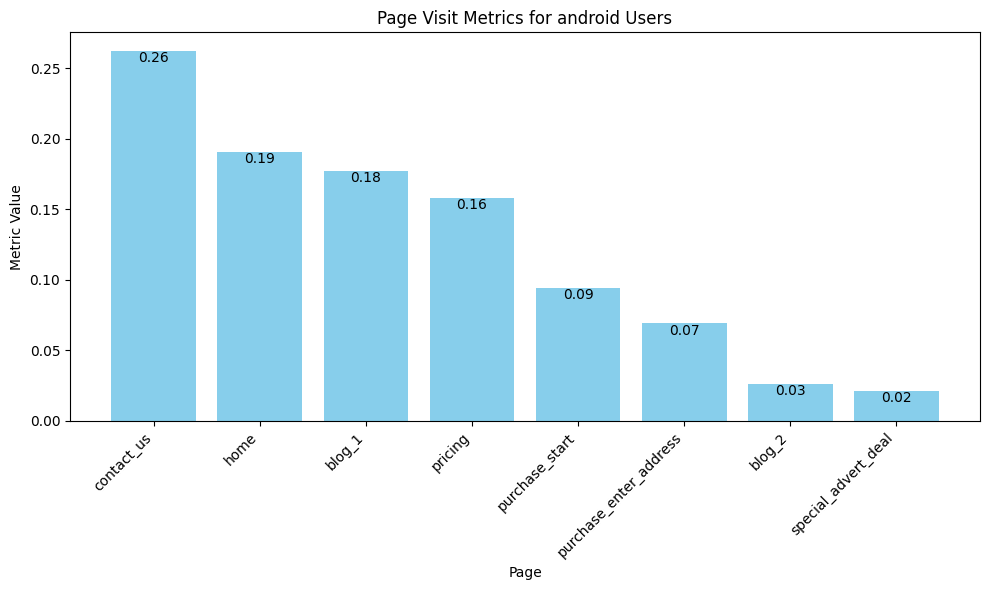

ios
OrderedDict([('contact_us', 0.24702066870865616),
             ('home', 0.1815912074335281),
             ('blog_1', 0.1723507760418007),
             ('pricing', 0.1484131682582173),
             ('purchase_enter_address', 0.11194049059226274),
             ('purchase_start', 0.08895523924738102),
             ('blog_2', 0.026974852642145632),
             ('special_advert_deal', 0.02275359707600834)])


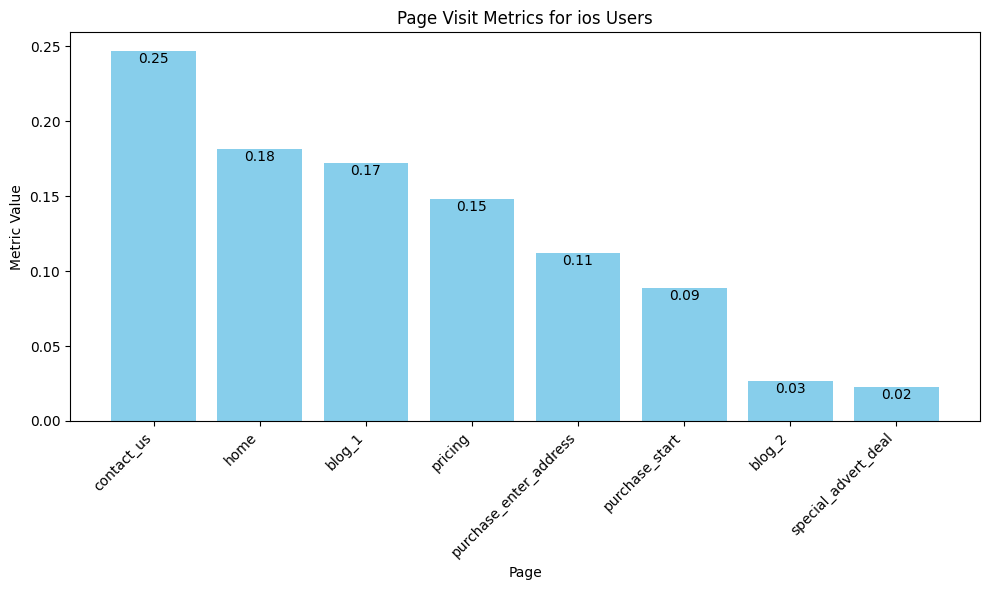

windows
OrderedDict([('contact_us', 0.25820232399179766),
             ('home', 0.2054853041695147),
             ('pricing', 0.1674213943950786),
             ('blog_1', 0.14853896103896103),
             ('purchase_start', 0.1063738892686261),
             ('purchase_enter_address', 0.05207621326042379),
             ('special_advert_deal', 0.03648325358851675),
             ('blog_2', 0.02541866028708134)])


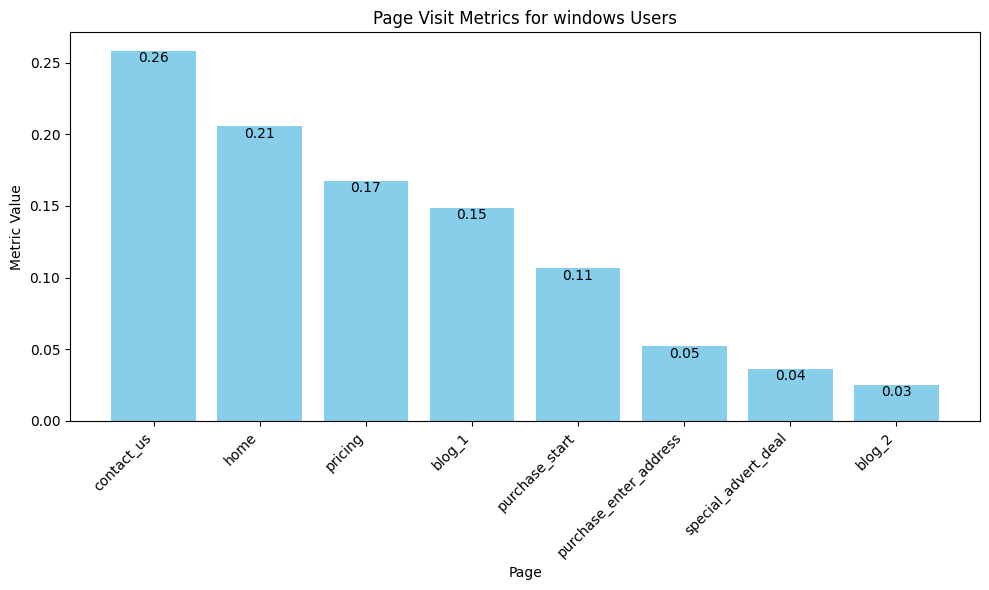

mac
OrderedDict([('contact_us', 0.2567286024065649),
             ('home', 0.2033674901143756),
             ('pricing', 0.1704579276329776),
             ('blog_1', 0.14958118967643183),
             ('purchase_start', 0.10753008206131213),
             ('purchase_enter_address', 0.0522556231132276),
             ('special_advert_deal', 0.035758323057953144),
             ('blog_2', 0.024320761937157192)])


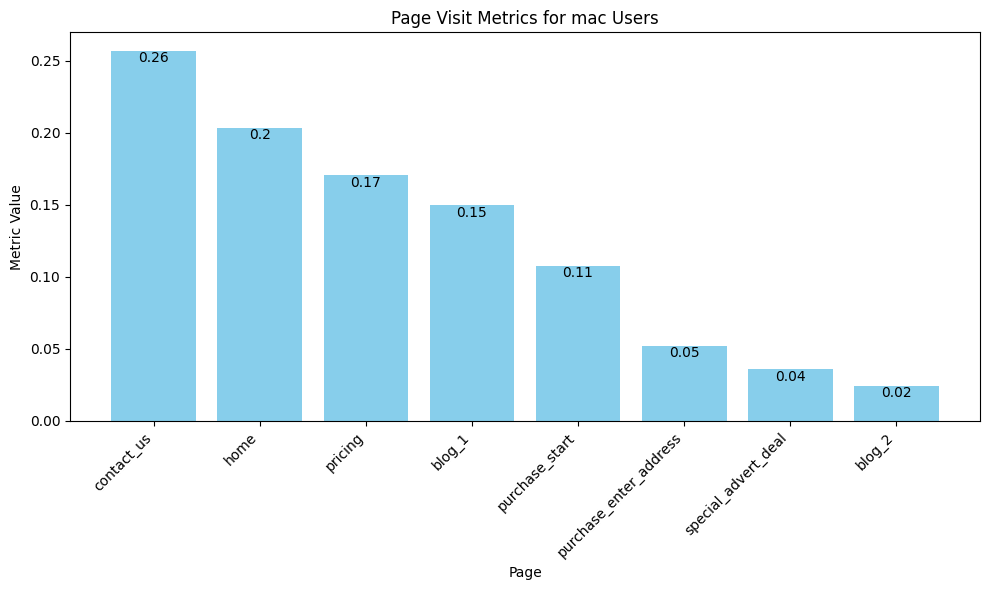

unknown
OrderedDict([('contact_us', 0.25610846245530394),
             ('blog_1', 0.15971394517282478),
             ('pricing', 0.15822407628128723),
             ('home', 0.1518921334922527),
             ('purchase_start', 0.10853694874851014),
             ('purchase_enter_address', 0.07345053635280095),
             ('special_advert_deal', 0.06533075089392133),
             ('blog_2', 0.026743146603098927)])


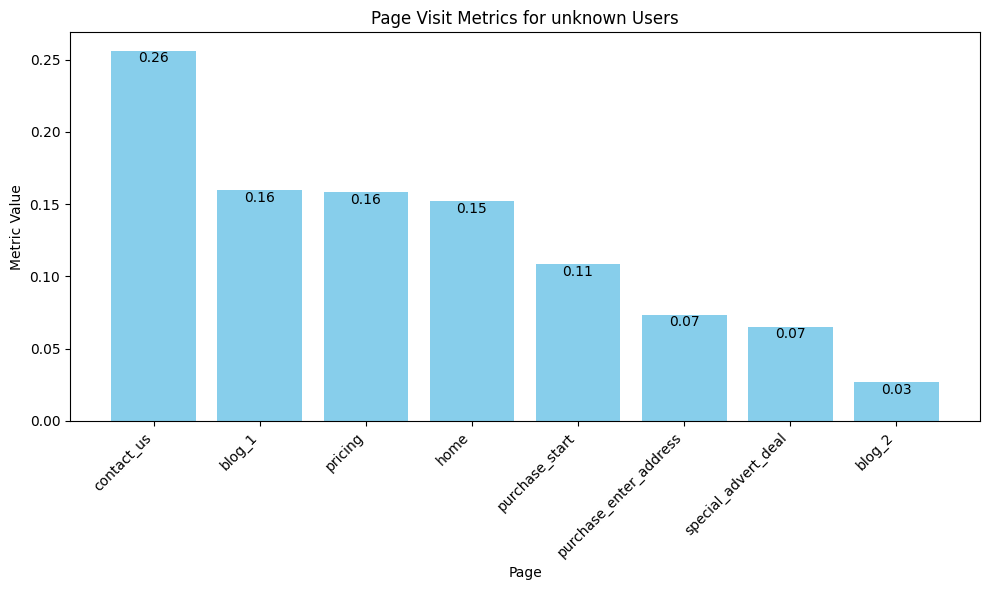

In [147]:
for pl in ["android", "ios", "windows", "mac", "unknown"]:
    last_stage_dict = defaultdict(int)
    total_stop_dict = defaultdict(int)
    result_dict = defaultdict(int)
    total_stop = 0
    for i in all_data:
        if "purchase_success" not in i.clickstream and i.platform == pl:
            total_stop += 1
            last_stage_dict[i.clickstream[-1]] += 1

    from collections import OrderedDict

    # Calculate the proportions
    for key in last_stage_dict.keys():
        result_dict[key] = last_stage_dict[key] / total_stop

    # Sort the dictionary by value in descending order and keep the order
    sorted_result_dict = OrderedDict(
        sorted(result_dict.items(), key=lambda item: item[1], reverse=True)
    )

    print(pl)
    pp.pprint(sorted_result_dict)

    # 准备x轴和y轴的数据
    pages = list(sorted_result_dict.keys())
    values = list(sorted_result_dict.values())

    # 创建条形图
    plt.figure(figsize=(10, 6))  # 可以调整大小以适合你的数据
    bars = plt.bar(pages, values, color="skyblue")  # 可以自定义颜色

    # 添加标题和轴标签
    plt.title(f"Page Visit Metrics for {pl} Users")
    plt.xlabel("Page")
    plt.ylabel("Metric Value")

    # 在每个条形旁边添加数据
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval - 0.01,
            round(yval, 2),
            ha="center",
            va="bottom",
        )

    # 旋转x轴标签以便它们更容易阅读
    plt.xticks(rotation=45, ha="right")

    # 显示图表
    plt.tight_layout()  # 调整布局以适应标签
    plt.show()

In [148]:
total_visit_dict = defaultdict(int)
platform_start_dict = defaultdict(int)
platform_success_dict = defaultdict(int)
dropout_dict = defaultdict(int)

total_success = 0
blog1 = 0
blog2 = 0

for i in all_data:

    total_visit_dict[i.platform] += 1
    if "purchase_success" in i.clickstream and (
        "blog_1" in i.clickstream or "blog_2" in i.clickstream
    ):
        total_success += 1
        if "blog_1" in i.clickstream:
            blog1 += 1
        if "blog_2" in i.clickstream:
            blog2 += 1

print(blog1 / total_success, blog2 / total_success)

0.6040581597222222 0.4850260416666667


In [82]:
import pandas as pd

clickstream_data = pd.read_csv(file_path, header=None)

# Rename the first two columns
clickstream_data = clickstream_data.rename(columns={0: "origin", 1: "platform"})

# Rename the remaining columns
for i in range(2, len(clickstream_data.columns)):
    clickstream_data = clickstream_data.rename(columns={i: f"page_{i-1}"})

clickstream_data

C:\Users\redhawc\AppData\Local\Temp\ipykernel_47148\2778731444.py:3: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  clickstream_data = pd.read_csv(file_path, header=None)


origin platform               page_1      page_2  \
0        linkedin_share  android               blog_1        home   
1        facebook_share      ios               blog_1     pricing   
2                search  android                 home      blog_1   
3        facebook_share  windows               blog_2        home   
4        facebook_share      ios                 home      blog_1   
...                 ...      ...                  ...         ...   
160395           search      ios           contact_us        home   
160396           search      ios                 home  contact_us   
160397  facebook_advert      mac  special_advert_deal         NaN   
160398   linkedin_share  android               blog_1  contact_us   
160399   facebook_share  android                 home      blog_1   

                page_3          page_4                  page_5  \
0              pricing  purchase_start  purchase_enter_address   
1       purchase_start          blog_1                     NaN   
2                  NaN             NaN                     NaN   
3               blog_1             NaN                     NaN   
4                  NaN             NaN                     NaN   
...                ...             ...                     ...   
160395         pricing  purchase_start  purchase_enter_address   
160396             NaN             NaN                     NaN   
160397             NaN             NaN                     NaN   
160398             NaN             NaN                     NaN   
160399            home             NaN                     NaN   

                  page_6 page_7 page_8 page_9 page_10 page_11 page_12 page_13  \
0       purchase_success    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
1                    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
2                    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
3                    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
4                    NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
...                  ...    ...    ...    ...     ...     ...     ...     ...   
160395           pricing    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
160396               NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
160397               NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
160398               NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   
160399               NaN    NaN    NaN    NaN     NaN     NaN     NaN     NaN   

       page_14 page_15 page_16 page_17 page_18  
0          NaN     NaN     NaN     NaN     NaN  
1          NaN     NaN     NaN     NaN     NaN  
2          NaN     NaN     NaN     NaN     NaN  
3          NaN     NaN     NaN     NaN     NaN  
4          NaN     NaN     NaN     NaN     NaN  
...        ...     ...     ...     ...     ...  
160395     NaN     NaN     NaN     NaN     NaN  
160396     NaN     NaN     NaN     NaN     NaN  
160397     NaN     NaN     NaN     NaN     NaN  
160398     NaN     NaN     NaN     NaN     NaN  
160399     NaN     NaN     NaN     NaN     NaN  

[160400 rows x 20 columns]

In [83]:
# Convert the wide format data to long format
long_format_data = clickstream_data.melt(
    id_vars=["origin", "platform"],
    value_vars=[f"page_{i}" for i in range(1, len(clickstream_data.columns) - 1)],
    var_name="stage",
    value_name="page",
)

# Calculate the visit count for each platform at each stage
visit_counts = (
    long_format_data.groupby(["platform", "page"]).size().reset_index(name="count")
)

# Find the stages where each platform struggles
struggling_stages = visit_counts.loc[visit_counts.groupby("platform")["count"].idxmin()]

struggling_stages

platform                 page  count
8   android  special_advert_deal   3400
17      ios  special_advert_deal   3400
26      mac  special_advert_deal   3400
34  unknown     purchase_success   1997
44  windows  special_advert_deal   3400

In [84]:
# Define the platforms
platforms = ["android", "ios", "windows", "unknown", "mac"]

# Find the last stage for each user
clickstream_data["last_stage"] = clickstream_data[clickstream_data.columns[2:]].apply(
    lambda row: row.dropna().values[-1] if row.dropna().values.size > 0 else None,
    axis=1,
)

# Calculate the count of users who stopped at each stage for each platform
platform_stage_counts = clickstream_data.groupby("platform")[
    "last_stage"
].value_counts()

# Filter the counts for the platforms of interest
platform_stage_counts = platform_stage_counts.loc[platforms]

# Find the stage with the highest count for each platform
highest_count_stages = platform_stage_counts.groupby("platform").idxmax()

print(highest_count_stages)

platform
android    (android, contact_us)
ios            (ios, contact_us)
mac            (mac, contact_us)
unknown    (unknown, contact_us)
windows    (windows, contact_us)
Name: count, dtype: object
